In [1]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ba4791e48a9806963092e11dccf270d05e570b1a6038e3158221b4d83a8e2033
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=54d9c9076a23598a270419c9e19c16d10bd16bacc1c9d8e42502336638e7eda7
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [2]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
reducer = umap.UMAP()

In [4]:
deer=pd.read_csv('deers_geom.csv')
deer=deer.fillna(0)


In [18]:
deer

,filename,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,...,Kx,Ky,Nx,Ny,xx,xy,yx,yy,Wx,Wy
0,1,32.0,488.0,892.0,587.0,878.0,928.0,409.0,874.0,316.0,...,90.0,50.0,361.0,416.0,418.0,1021.0,894.0,1134.0,0.0,0.0
1,2,64.0,239.0,1202.0,462.0,1091.0,622.0,613.0,580.0,494.0,...,241.0,55.0,300.0,180.0,501.0,535.0,1108.0,762.0,0.0,0.0
2,3,36.0,396.0,942.0,281.0,910.0,430.0,433.0,444.0,322.0,...,33.0,140.0,299.0,275.0,407.0,627.0,967.0,596.0,0.0,0.0
3,4,280.0,379.0,1386.0,442.0,1239.0,680.0,712.0,614.0,679.0,...,39.0,79.0,607.0,341.0,619.0,767.0,1235.0,825.0,0.0,0.0
4,5,278.0,777.0,1176.0,652.0,1195.0,905.0,612.0,870.0,561.0,...,61.0,99.0,501.0,661.0,547.0,973.0,1195.0,1080.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,825.0,421.0,210.0,179.0,201.0,372.0,589.0,485.0,635.0,...,982.0,211.0,738.0,290.0,588.0,577.0,176.0,420.0,0.0,0.0
152,153,305.0,413.0,918.0,701.0,901.0,756.0,573.0,608.0,553.0,...,249.0,110.0,448.0,439.0,544.0,649.0,868.0,830.0,0.0,0.0
153,154,456.0,365.0,234.0,107.0,171.0,227.0,310.0,335.0,390.0,...,503.0,312.0,405.0,268.0,301.0,356.0,162.0,270.0,0.0,0.0
154,155,198.0,112.0,519.0,284.0,472.0,358.0,313.0,243.0,320.0,...,222.0,23.0,274.0,113.0,288.0,281.0,438.0,407.0,537.0,290.0


In [5]:
deer.filename.value_counts()

1      1
108    1
101    1
102    1
103    1
      ..
53     1
54     1
55     1
56     1
156    1
Name: filename, Length: 156, dtype: int64

In [ ]:
#sns.pairplot(deer.head(10), hue='filename');

In [ ]:
#НАЧАЛО!

In [6]:
deer_data = deer[['Ax', 'Ay', 'Bx',
           'By', 'Cx', 'Cy', 'Dx',
           'Dy', 'Ex', 'Ey', 'Fx', 
           'Fy', 'Hx', 'Hy', 'Ix',
           'Iy', 'Lx', 'Ly', 'Kx',
           'Ky', 'Nx', 'Ny', 'xx', 
         'xy', 'yx', 'yy', 'Wx', 'Wy']
].values
#scaled_deer_data = StandardScaler().fit_transform(deer_data)

In [ ]:
scaled_deer_data = StandardScaler().fit_transform(deer_data)

In [7]:
embedding=reducer.fit_transform(scaled_deer_data)
embedding.shape

(156, 2)

In [8]:
embedding

array([[ 6.07884645e-01,  4.14507008e+00],
       [ 5.39118290e-01,  4.86592102e+00],
       [ 9.48461533e-01,  5.17933607e+00],
       [ 4.98352259e-01,  4.37142229e+00],
       [ 3.58973145e-01,  3.74055052e+00],
       [ 4.24514115e-01,  3.84602594e+00],
       [ 1.57636344e+00,  6.18257856e+00],
       [ 3.52179360e+00,  1.06728239e+01],
       [ 3.51014543e+00,  9.26715279e+00],
       [ 1.26607955e+00,  6.04780483e+00],
       [ 5.64038515e+00,  1.24998379e+01],
       [ 5.53345633e+00,  1.27783260e+01],
       [ 5.60282803e+00,  1.26459370e+01],
       [ 3.14056695e-01,  3.76758742e+00],
       [-1.31581891e-02,  3.66256905e+00],
       [ 4.60132092e-01,  4.04944754e+00],
       [ 1.53727663e+00,  6.21480370e+00],
       [ 5.77199697e-01,  4.53928232e+00],
       [ 5.16370058e-01,  3.69035935e+00],
       [ 5.29198647e+00,  1.11410723e+01],
       [ 5.39587975e+00,  1.14620771e+01],
       [ 3.68563890e-01,  4.62622356e+00],
       [ 5.52529716e+00,  1.17961626e+01],
       [ 5.

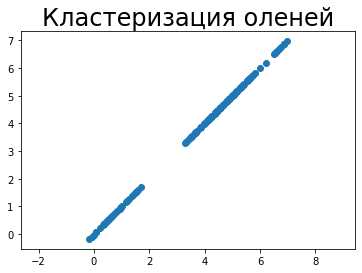

In [10]:
#что-то...
plt.scatter(
    embedding[:, 0],
    embedding[:, 0])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Кластеризация оленей', fontsize=24);

In [21]:
#метрика другая должна быть
mapper = umap.UMAP(metric='hellinger', random_state=10)
embedding = mapper.fit_transform(deer)
#display(test_embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, cmap='Spectral')

ValueError: ignored

In [11]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3774018 sha256=81f2a21f5b257d103100c0f42f56586b0ae46244d8e421be083a0dd4bd7d8d86
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [12]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
#target = scaled_deer_data.astype(int)

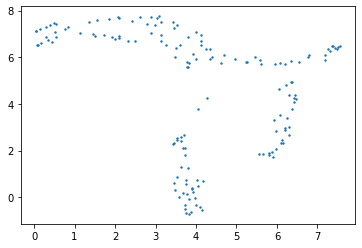

In [13]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(scaled_deer_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');

In [17]:
plt.savefig('кластеризация')

<Figure size 432x288 with 0 Axes>